<a href="https://colab.research.google.com/github/Aldistwn29/machineLearning/blob/main/machineLearning_sesi2(Aldi_Setiawan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import library yg digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
data = {"kota":[1,2,3,4,5,6,7,8],
        "Pendapatan_rata-rata(1000$)":[5,10,20,8,4,6,12,15],
        "Penjual_pizza(1000 buah)":[27,46,73,40,30,28,46,59]}
df = pd.DataFrame(data)

In [5]:
# melihat 5 data awal
df.head()

,kota,Pendapatan_rata-rata(1000$),Penjual_pizza(1000 buah)
0,1,5,27
1,2,10,46
2,3,20,73
3,4,8,40
4,5,4,30


In [6]:
# melihat jumlah baris dan kolom pada data
df.shape

(8, 3)

In [7]:
# melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   kota                         8 non-null      int64
 1   Pendapatan_rata-rata(1000$)  8 non-null      int64
 2   Penjual_pizza(1000 buah)     8 non-null      int64
dtypes: int64(3)
memory usage: 320.0 bytes


In [8]:
# melihat statistika deskrisinya
df.describe()

,kota,Pendapatan_rata-rata(1000$),Penjual_pizza(1000 buah)
count,8.00000,8.000000,8.000000
mean,4.50000,10.000000,43.625000
std,2.44949,5.477226,16.168201
min,1.00000,4.000000,27.000000
25%,2.75000,5.750000,29.500000
50%,4.50000,9.000000,43.000000
75%,6.25000,12.750000,49.250000
max,8.00000,20.000000,73.000000


In [9]:
# menangani missing value
df.isnull().sum()

kota                           0
Pendapatan_rata-rata(1000$)    0
Penjual_pizza(1000 buah)       0
dtype: int64

# EDA

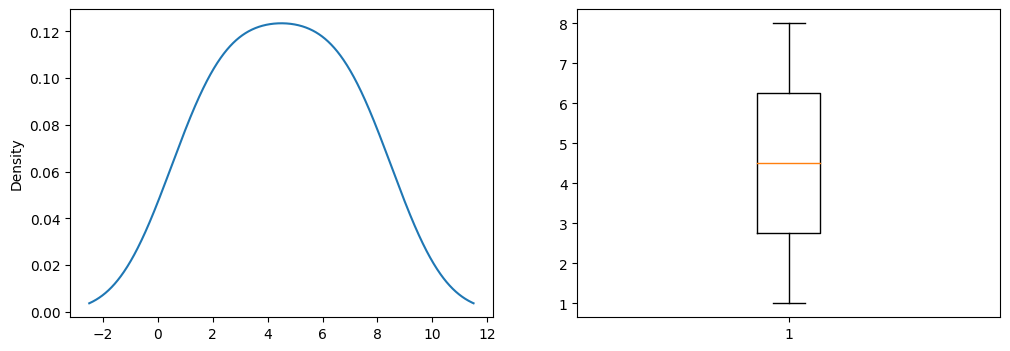

In [10]:
# unvariate analysis kota
# melihat distribusi dari kota
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['kota'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['kota'])
plt.show()

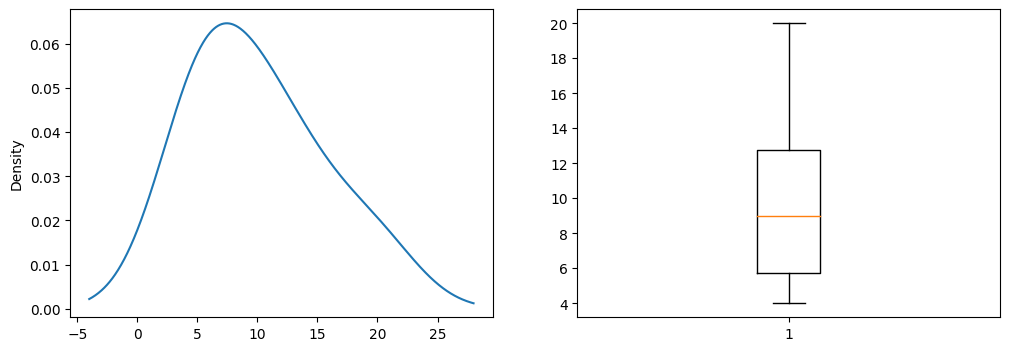

In [11]:
# Unvariate analysis pendapatan_rata-rata(1000$)
# melihat distribusi dari pendapatan_rata-rata(1000$)
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Pendapatan_rata-rata(1000$)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Pendapatan_rata-rata(1000$)'])
plt.show()

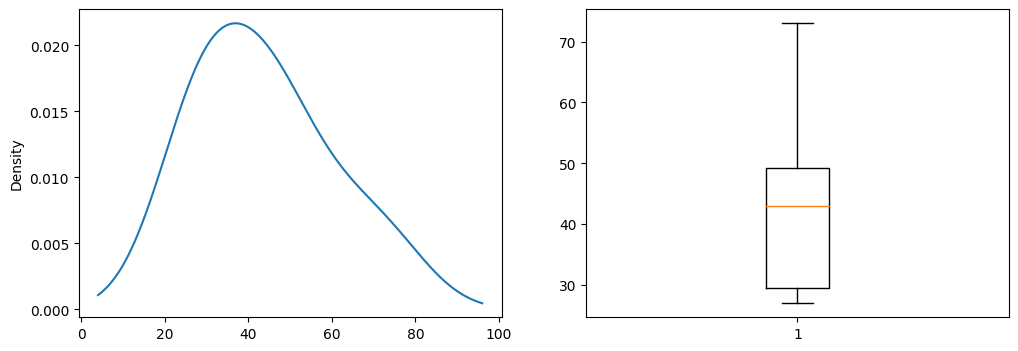

In [12]:
# Unvariate analysis Penjual_pizza(1000 buah)
# melihat distribusi dari Penjual_pizza(1000 buah)
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['Penjual_pizza(1000 buah)'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['Penjual_pizza(1000 buah)'])
plt.show()

dari grafik yg di hasilkan tidak ada outla

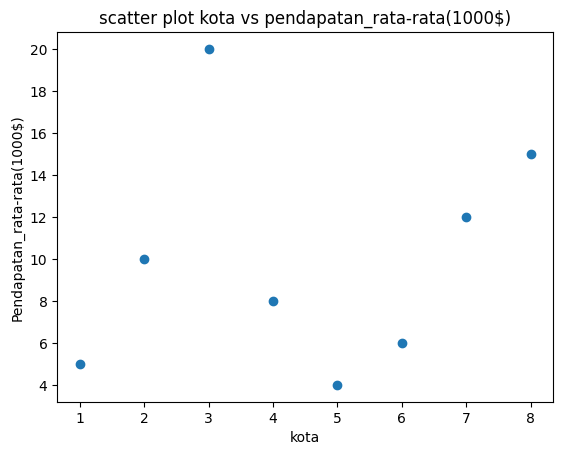

In [13]:
# bivariate analysis kota dan Pendapatan_rata-rata(1000$)
# melihat dari distribusi dari kota dan Pendapatan_rata-rata(1000$)
plt.scatter(df['kota'], df['Pendapatan_rata-rata(1000$)'])
plt.xlabel('kota')
plt.ylabel('Pendapatan_rata-rata(1000$)')
plt.title('scatter plot kota vs pendapatan_rata-rata(1000$)')
plt.show()

terlihat bahwa pola yg di hasilkan scatter plotnya itu acak-acak yg mengidentifikasikan bahwa korelasinya cukup lemah

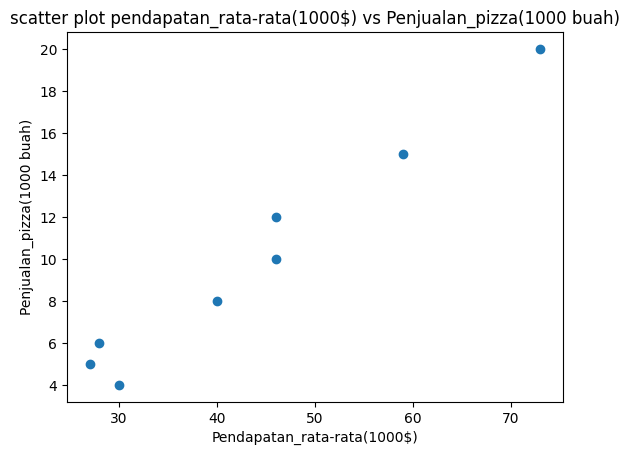

In [62]:
# bivariate analysis Pendapatan_rata-rata(1000$) dan Penjualan_pizza(1000 buah)
# melihat dari distribusi dari Pendapatan_rata-rata(1000$) dan Penjualan_pizza(1000 buah)
plt.scatter(df['Penjual_pizza(1000 buah)'],df['Pendapatan_rata-rata(1000$)'])
plt.xlabel('Pendapatan_rata-rata(1000$)')
plt.ylabel('Penjualan_pizza(1000 buah)')
plt.title('scatter plot pendapatan_rata-rata(1000$) vs Penjualan_pizza(1000 buah)')
plt.show()

dari scatter plot bisa dilihat bahwa terdapat korelasi positif. hal ini berarti seiring bertambahnya nilai dari Pendapatan_rata-rata(1000$) dan Penjualan_pizza(1000 buah) pun akan bertambah.

In [63]:
# melihat nilai korelasinya
df.corr()

,kota,Pendapatan_rata-rata(1000$),Penjual_pizza(1000 buah)
kota,1.000000,0.181015,0.142483
Pendapatan_rata-rata(1000$),0.181015,1.000000,0.984033
Penjual_pizza(1000 buah),0.142483,0.984033,1.000000


jadi antara ketiga variabel yg sudah di analisi terdapat korelasi dengan nilai tertinggi antara kolom Pendapatan_rata-rata(1000$) dan Penjual_pizza(1000 buah) = 0.98

In [106]:
# Membuat variabel
x = df['Pendapatan_rata-rata(1000$)'].values.reshape(-1,1)
y = df['Penjual_pizza(1000 buah)'].values.reshape(-1,1)

# Melatih Model

In [115]:
# melatih model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [116]:
lin_reg = LinearRegression()

In [117]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [118]:
print(f'Slope: {lin_reg.coef_}')

Slope: [3.14018692]


In [119]:
print(f'Intercept: {lin_reg.intercept_}')

Intercept: 11.69158878504673


In [120]:
lin_reg.score(x_test, y_test)

0.9618478751276441

Text(0.5, 1.0, 'Pendapatan_rata-rata(1000$) vs Penjualan_pizza(1000 buah)')

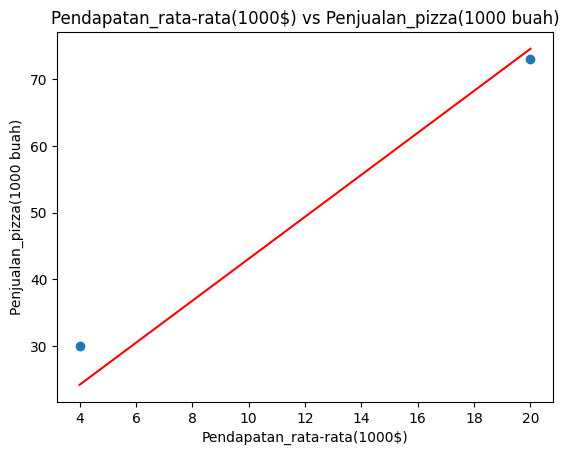

In [142]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Pendapatan_rata-rata(1000$)')
plt.ylabel('Penjualan_pizza(1000 buah)')
plt.title('Pendapatan_rata-rata(1000$) vs Penjualan_pizza(1000 buah)')

Mengghitung SSR

In [122]:
y_mean = np.mean(y)
# menghitung ssr nya
ssr = np.sum((y_prediksi - y_mean) ** 2)
print(f'SSR : {ssr}')

SSR : 1328.277188509914


Menghitung SSE

In [134]:
Y = df['Penjual_pizza(1000 buah)'].values.reshape(-1,1)
# menghitung sst
sse = np.sum((Y - y_prediksi ) ** 2)
print(f'SSE: {sse}')

SSE: 14285.967508079311


SST

In [135]:
Y= df['Penjual_pizza(1000 buah)']
# menghitung sst
sst = np.sum((Y - y_mean) ** 2)
print(f'SST: {sst}')

SST: 1829.875


menghitung R_squared

In [151]:
#Menghitung error

from sklearn.metrics import r2_score
x_test = df['Pendapatan_rata-rata(1000$)'].values.reshape(-1,1)
y_test = df['Penjual_pizza(1000 buah)'].values
y_prediksi = lin_reg.predict(x_test)
r_squared = r2_score(y_test, y_prediksi)
print(f'R-squared: {r_squared}')

R-squared: 0.9607242187113249
